# DELETE Region

- Region: [25050350-25552650]
- Window size: 100
- Sam configuration:

```
"sam_read_config":{
    "max_depth":1000,
    "ignore_orphans":false,
    "truncate":true,
    "quality_threshold":20,
    "add_indels":true
  },
```

In [1]:
import sys
sys.path.append("../")

In [2]:
from itertools import cycle, islice

In [3]:
from sklearn import mixture
from sklearn import metrics
from sklearn.cluster import KMeans

In [4]:
import numpy as np
from scipy.stats import kde
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [5]:
sns.set(color_codes=True)

In [6]:
def load_data_file(filename):

    with open(filename) as file:
        context = file.read()
        size = len(context)
        arraystr= context[1:size-1]
        arraystr = arraystr.split(',')
        region_means = [float(item) for item in arraystr]
        return region_means

In [7]:
wga_mean_file = "/home/a/ag568/wga_windows_mean_0_DELETE.txt"
no_wga_mean_file = "/home/a/ag568/no_wga_windows_mean_0_DELETE.txt"
gc_file = "/home/a/ag568/windows_gc_0_DELETE.txt"

In [8]:
wga_mu = load_data_file(filename=wga_mean_file)
no_wga_mu = load_data_file(filename=no_wga_mean_file)
gc = load_data_file(filename=gc_file)

In [9]:
assert len(wga_mu) == len(no_wga_mu)
assert len(gc) == len(wga_mu)

In [10]:
print("Size of WGA sample {0}".format(len(wga_mu)))
print("WGA max: {0}".format(max(wga_mu)))
print("WGA min: {0}".format(min(wga_mu)))
print("WGA mean: {0}".format(np.mean(wga_mu)))
print("WGA var: {0}".format(np.var(wga_mu)))

Size of WGA sample 4969
WGA max: 46.49
WGA min: 0.0
WGA mean: 15.661704568323609
WGA var: 84.360355657538


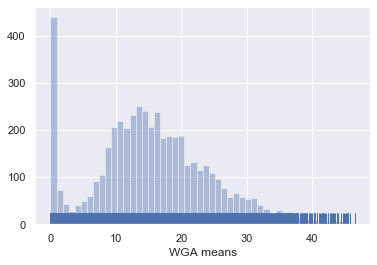

In [12]:
sns.distplot(wga_mu, bins=50, kde=False, rug=True)
plt.xlabel("WGA means")
plt.show()

In [13]:
print("NO-WGA size {0}".format(len(no_wga_mu)))
print("NO-WGA max: {0}".format(max(no_wga_mu)))
print("NO-WGA min: {0}".format(min(no_wga_mu)))
print("NO-WGA mean: {0}".format(np.mean(no_wga_mu)))
print("NO-WGA var: {0}".format(np.var(no_wga_mu)))

NO-WGA size 4969
NO-WGA max: 34.21
NO-WGA min: 0.0
NO-WGA mean: 14.670432682632322
NO-WGA var: 47.206535192137714


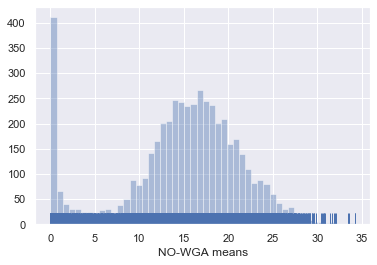

In [15]:
sns.distplot(no_wga_mu, bins=50, kde=False, rug=True)
plt.xlabel("NO-WGA means")
plt.show()

In [17]:
#nbins = 100
#min_ = 0.0
#max_ = 50.0
#density=False
#plt.hist2d(no_wga_mu, wga_mu,
#             bins=[nbins, nbins], cmap='Blues', density=density,
#             cmax=1000, cmin=0, alpha=0.99,
#             range=((min_, max_), (min_, max_)))

#kernel= kde.gaussian_kde(np.vstack([no_wga_mu, wga_mu]))
#xi, yi = np.mgrid[min_:max_:nbins*1j,
#                    min_:max_:nbins*1j]
#zi = kernel(np.vstack([xi.flatten(), yi.flatten()]))
#plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap='Blues') 
#plt.contour(xi, yi, zi.reshape(xi.shape) )

#plt.show()

In [18]:
X = np.stack((no_wga_mu, wga_mu), axis=0)
cov = np.cov(X)
print("Covariance matrix: \n", cov)

v, w = linalg.eigh(cov)
print(" Eigenvalues: \n", v)
print(" Eigenvectors: \n", w)

Covariance matrix: 
 [[47.21603731 37.56469119]
 [37.56469119 84.37733641]]
 Eigenvalues: 
 [ 23.88789826 107.70547546]
 Eigenvectors: 
 [[-0.84951729  0.52756077]
 [ 0.52756077  0.84951729]]


In [19]:
ratio = []
for no_wga, wga  in zip(no_wga_mu, wga_mu):
    ratio.append((wga + 1)/(no_wga + 1))
    
ratio = np.array(ratio)
print("NaN in ratio: ", np.any(np.isnan(ratio)))
print("Max ratio: ", max(ratio))
print("Min ratio: ", min(ratio))
X = np.stack((no_wga_mu, wga_mu, ratio), axis=0)
cov = np.cov(X)
print("Covariance matrix: \n", cov)

v, w = linalg.eigh(cov)
print(" Eigenvalues: \n", v)
print(" Eigenvectors: \n", w)

NaN in ratio:  False
Max ratio:  6.25
Min ratio:  0.1486161251504212
Covariance matrix: 
 [[47.21603731 37.56469119 -0.80773037]
 [37.56469119 84.37733641  2.62864199]
 [-0.80773037  2.62864199  0.25938478]]
 Eigenvalues: 
 [4.88011545e-02 2.40680880e+01 1.07735869e+02]
 Eigenvectors: 
 [[ 0.06476226  0.84731149 -0.52713289]
 [-0.05989869 -0.52398863 -0.84961642]
 [ 0.9961014  -0.08659765 -0.01681815]]


In [46]:
#from mpl_toolkits import mplot3d
#fig = plt.figure(figsize=(20,10))
#ax = plt.axes(projection='3d')
#ax.scatter3D(no_wga_mu, wga_mu, ratio, c=ratio, cmap='viridis', linewidth=0.5);
#ax.set_xlabel('NO-WGA')
#ax.set_ylabel('WGA')
#ax.set_zlabel('Ratio')

In [22]:
pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
print("Pearson correlation: ", pearson)

Pearson correlation:  0.5951441232145166


In [16]:
#fig, axs = plt.subplots(1, 1)#, figsize=(9, 3))
#nbins = 100
#min_ = 0.0
#max_ = 50.0
#density=False
#plt.hist2d(no_wga_mu, wga_mu,
#             bins=[nbins, nbins], cmap='Blues', density=density,
#             cmax=1000, cmin=0, alpha=0.99,
#             range=((min_, max_), (min_, max_)))

#v, w = linalg.eigh(cov)
    
#angle = np.arctan2(w[0][1], w[0][0])
#angle = 180. * angle / np.pi  # convert to degrees
#v = 2. * np.sqrt(2.) * np.sqrt(v)
#ell = mpl.patches.Ellipse(means, v[0], v[1], 180. + angle, color='darkorange')
#ell.set_alpha(.6)
#axs.add_patch(ell)
#plt.show()

In [23]:
print("GC size {0}".format(len(gc)))
print("GC max: {0}".format(max(gc)))
print("GC min: {0}".format(min(gc)))
print("GC mean: {0}".format(np.mean(gc)))
print("GC var: {0}".format(np.var(gc)))

GC size 4969
GC max: 0.9
GC min: 0.13
GC mean: 0.4625518212920105
GC var: 0.010317698310729987


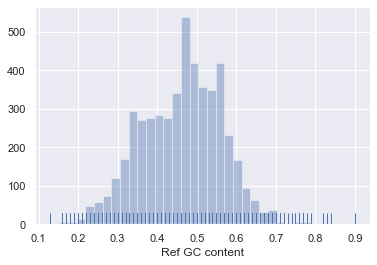

In [24]:
sns.distplot(gc, bins=35, kde=False, rug=True)
plt.xlabel("Ref GC content")
plt.show()

In [25]:
def make_data_array(wga_mu, no_wga_mu, gc, use_ratio, use_gc):
    data = []
    
    if use_ratio and use_gc:
        for no_wga_val, wga_val,gc_val in zip(no_wga_mu, wga_mu, gc):
            data.append([no_wga_val, wga_val, (wga_val + 1)/(no_wga_val + 1), gc_val])
    elif use_ratio:
        for no_wga, wga  in zip(no_wga_mu, wga_mu):
            data.append([no_wga, wga,  (wga + 1)/(no_wga + 1)])
    elif use_gc:
        
        for no_wga_val, wga_val , gc_val in zip(no_wga_mu, wga_mu,  gc):
            data.append([no_wga_val, wga_val, gc_val])
    else:
        
        for no_wga, wga  in zip(no_wga_mu, wga_mu):
            data.append([no_wga, wga ])
        
    return data

In [26]:
def kmeans_clustering(clusters, data, no_wga_mu, wga_mu):
    for nclusters in clusters:
    
        print("Number of clusters ", nclusters)
        kmeans = KMeans(n_clusters=nclusters)
        kmeans.fit(X=data)
        labels = kmeans.labels_
        centers = np.array(kmeans.cluster_centers_)

        calinski_harabasz_score = metrics.calinski_harabasz_score(data, labels)
        print("Calinski score: ", calinski_harabasz_score)
        davies_bouldin_score = metrics.davies_bouldin_score(data, labels)
        print("Davies score: ", davies_bouldin_score)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                          int(max(labels) + 1))))

        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])

        plt.scatter(no_wga_mu, wga_mu,  color=colors[labels])
        #plt.scatter(centers[:,0], centers[:,1], marker="x", color='r')
        plt.xlabel("NO-WGA ")
        plt.ylabel("WGA")
        plt.show()
    

In [27]:
def gmm_clustering(clusters, data, cov_type, tol,
                   max_itrs, n_init, no_wga_mu, wga_mu):
    
    for nclusters in clusters:
    
        print("Number of clusters ", nclusters)
        gmm = mixture.GaussianMixture(n_components=nclusters,
                                      covariance_type=cov_type,
                                      tol=tol, max_iter=max_itrs,
                                      n_init=n_init)
        gmm.fit(data)
        print("Converged: ", gmm.converged_)
        print("BIC: ", gmm.bic(data))
        labels = gmm.predict(data)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                          int(max(labels) + 1))))


        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])

        plt.scatter(no_wga_mu, wga_mu,  color=colors[labels])
        plt.xlabel("NO-WGA ")
        plt.ylabel("WGA")
        plt.show()
    

In [28]:
N_CLUSTERS = [2, 3, 4, 5]

## Two means 

In [29]:
data = make_data_array(wga_mu=wga_mu, 
                       no_wga_mu=no_wga_mu, gc=None, 
                       use_ratio=False, use_gc=False)

data = np.array(data)

assert data.shape == (len(wga_mu), 2)

### KMeans Clustering

Number of clusters  2
Calinski score:  4921.822184835155
Davies score:  0.7897468145081201


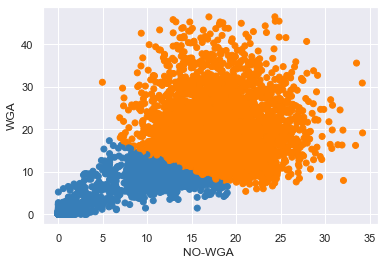

Number of clusters  3
Calinski score:  6791.099520600308
Davies score:  0.7293674420133582


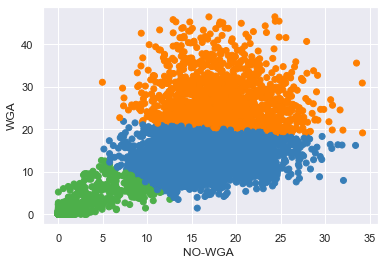

Number of clusters  4
Calinski score:  6701.860216225024
Davies score:  0.8451656264837925


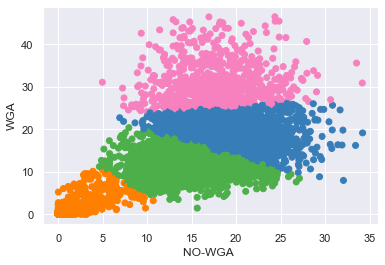

Number of clusters  5
Calinski score:  6797.776421322134
Davies score:  0.8121221196978718


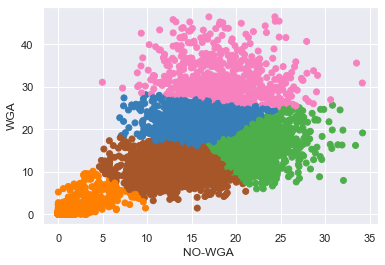

In [30]:
kmeans_clustering(clusters=N_CLUSTERS, data=data, no_wga_mu=no_wga_mu, wga_mu=wga_mu)


### GMM Clustering

### ```full```

Number of clusters  2
Converged:  True
BIC:  62874.401461785965


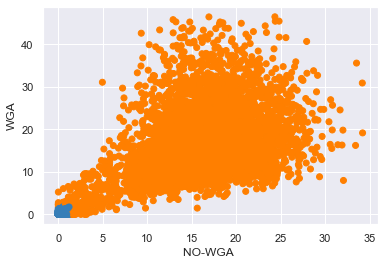

Number of clusters  3
Converged:  True
BIC:  61756.50050380718


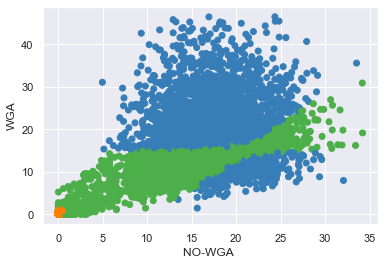

Number of clusters  4
Converged:  True
BIC:  58704.1161133808


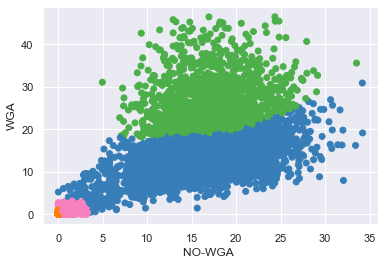

Number of clusters  5
Converged:  True
BIC:  58571.068713949564


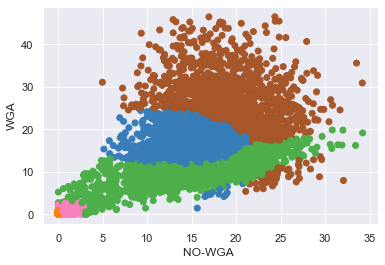

In [33]:
gmm_clustering(clusters=N_CLUSTERS, data=data, tol=1.0e-5, cov_type='full',
               max_itrs=300, n_init=1,
               no_wga_mu=no_wga_mu, wga_mu=wga_mu)


### ```tied```

Number of clusters  2
Converged:  True
BIC:  65938.19356539806


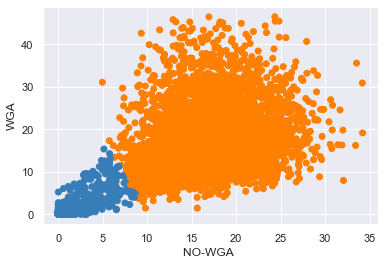

Number of clusters  3
Converged:  True
BIC:  64919.23280959417


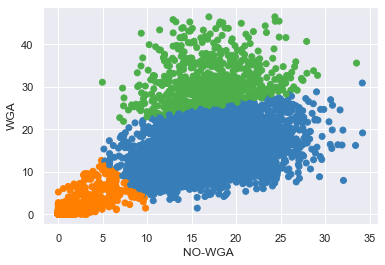

Number of clusters  4
Converged:  True
BIC:  64675.44163398982


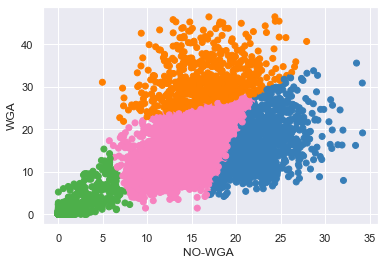

Number of clusters  5
Converged:  True
BIC:  64335.556053393666


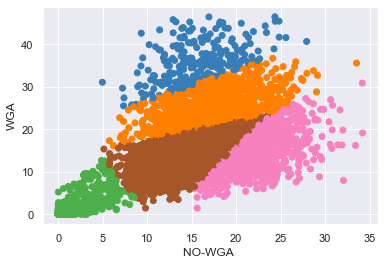

In [34]:
gmm_clustering(clusters=N_CLUSTERS, data=data, tol=1.0e-5, 
               cov_type='tied', max_itrs=300, n_init=1,
               no_wga_mu=no_wga_mu, wga_mu=wga_mu)

### ```diag```

Number of clusters  2
Converged:  True
BIC:  63621.44991773699


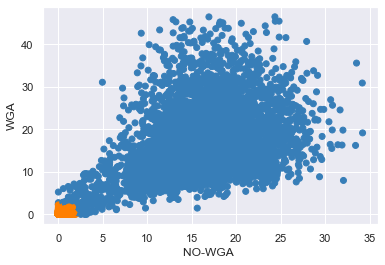

Number of clusters  3
Converged:  True
BIC:  59963.77317159732


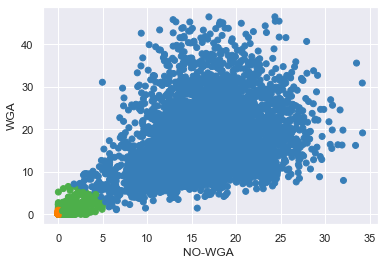

Number of clusters  4
Converged:  True
BIC:  59147.10756531058


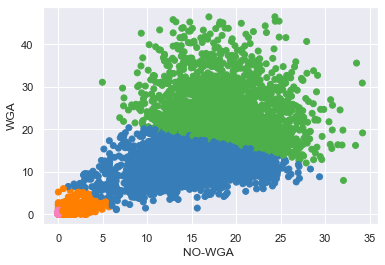

Number of clusters  5
Converged:  True
BIC:  58660.11027665607


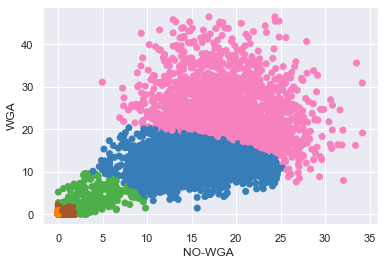

In [37]:
gmm_clustering(clusters=N_CLUSTERS, data=data, tol=1.0e-5, cov_type='diag',
               max_itrs=300, n_init=1,
               no_wga_mu=no_wga_mu, wga_mu=wga_mu)

### ```spherical```

Number of clusters  2
Converged:  True
BIC:  64392.97884036715


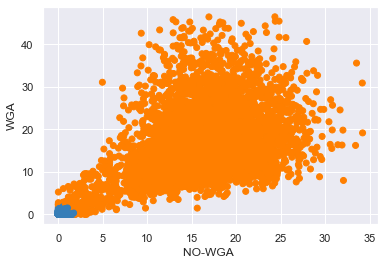

Number of clusters  3
Converged:  True
BIC:  63145.1518812651


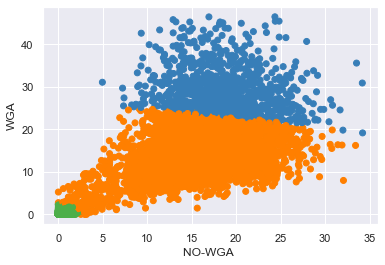

Number of clusters  4
Converged:  True
BIC:  57918.63403539137


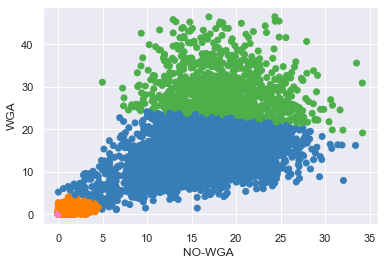

Number of clusters  5
Converged:  True
BIC:  57231.111020232194


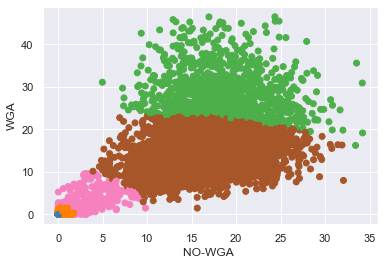

In [38]:
gmm_clustering(clusters=N_CLUSTERS, data=data, tol=1.0e-5, cov_type='spherical',
               max_itrs=300, n_init=1,
               no_wga_mu=no_wga_mu, wga_mu=wga_mu)

## Two means + Ratio

In [39]:



data = make_data_array(wga_mu=wga_mu, 
                       no_wga_mu=no_wga_mu, gc=None, 
                       use_ratio=True, use_gc=False)

data = np.array(data)

assert data.shape == (len(wga_mu), 3)

### KMeans

Number of clusters  2
Calinski score:  4903.208323689391
Davies score:  0.792201430904522


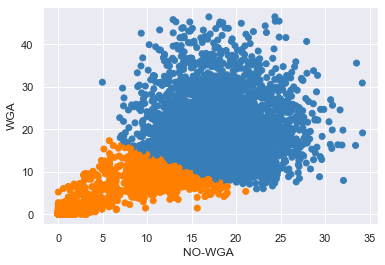

Number of clusters  3
Calinski score:  6760.81031553203
Davies score:  0.730928990660631


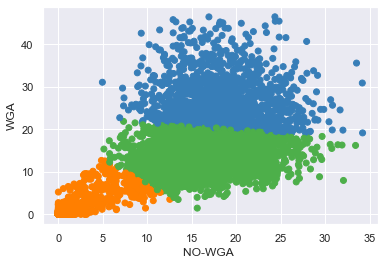

Number of clusters  4
Calinski score:  6666.472799317739
Davies score:  0.8468539127058428


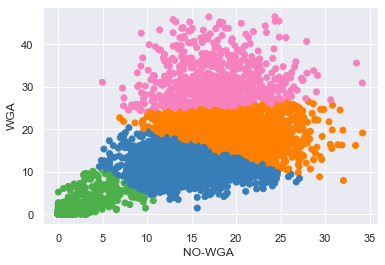

Number of clusters  5
Calinski score:  6756.442462609701
Davies score:  0.8126931843928595


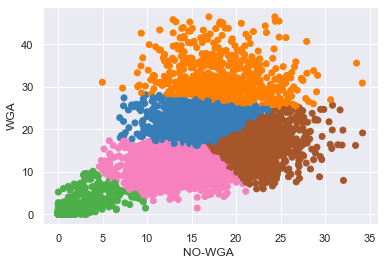

In [40]:
kmeans_clustering(clusters=N_CLUSTERS, data=data, no_wga_mu=no_wga_mu, wga_mu=wga_mu)

### GMM

### ```full```

Number of clusters  2
Converged:  True
BIC:  57043.37912575589


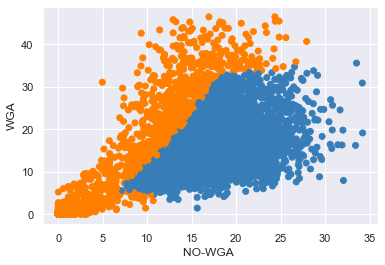

Number of clusters  3
Converged:  True
BIC:  52798.469721513575


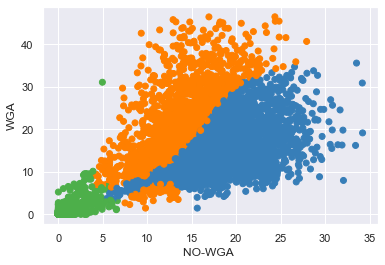

Number of clusters  4
Converged:  True
BIC:  43734.40039908665


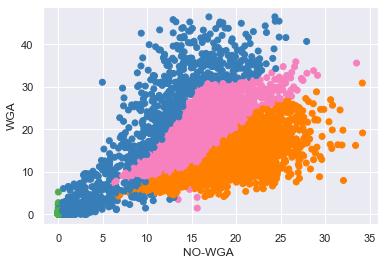

Number of clusters  5
Converged:  True
BIC:  41517.118498696975


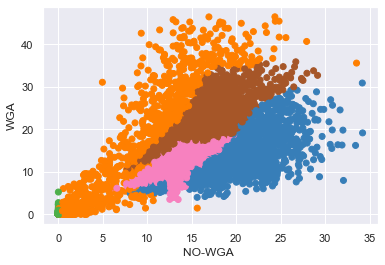

In [41]:
gmm_clustering(clusters=N_CLUSTERS, data=data, tol=1.0e-5, cov_type='full',
               max_itrs=300, n_init=1,
               no_wga_mu=no_wga_mu, wga_mu=wga_mu)

### ```tied```

Number of clusters  2
Converged:  True
BIC:  65102.20609215505


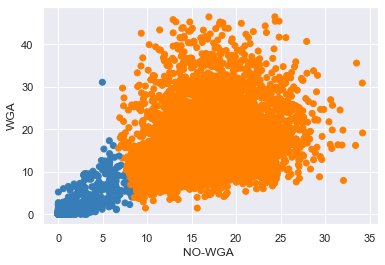

Number of clusters  3
Converged:  True
BIC:  64094.1807548846


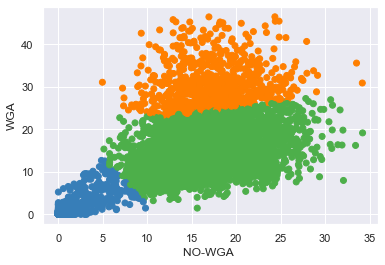

Number of clusters  4
Converged:  True
BIC:  63747.23789649061


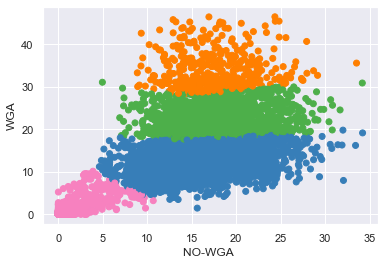

Number of clusters  5
Converged:  True
BIC:  62896.75620784338


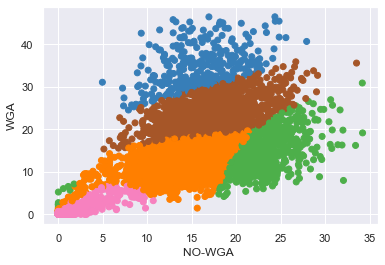

In [42]:
gmm_clustering(clusters=N_CLUSTERS, data=data, tol=1.0e-3, cov_type='tied',
               max_itrs=300, n_init=1,
               no_wga_mu=no_wga_mu, wga_mu=wga_mu)

### ```diag```

Number of clusters  2
Converged:  True
BIC:  70885.75525861712


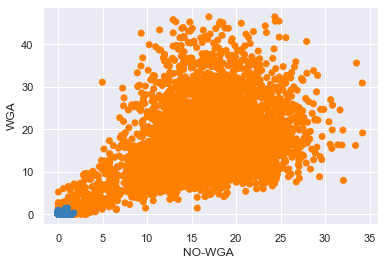

Number of clusters  3
Converged:  True
BIC:  67507.95500162766


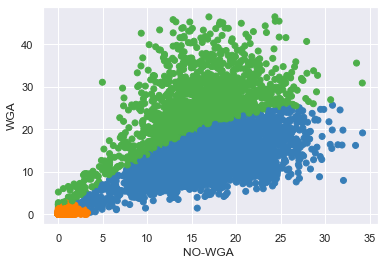

Number of clusters  4
Converged:  True
BIC:  65917.41661207382


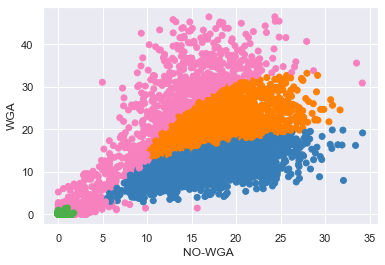

Number of clusters  5
Converged:  True
BIC:  58160.406542230485


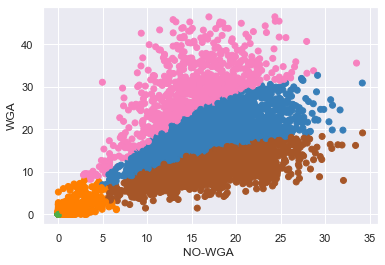

In [44]:
gmm_clustering(clusters=N_CLUSTERS, data=data, tol=1.0e-5, cov_type='diag',
               max_itrs=300, n_init=1,
               no_wga_mu=no_wga_mu, wga_mu=wga_mu)

### ```spherical```

Number of clusters  2
Converged:  True
BIC:  89375.96282500695


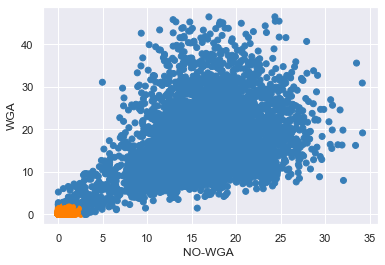

Number of clusters  3
Converged:  True
BIC:  85500.83452739437


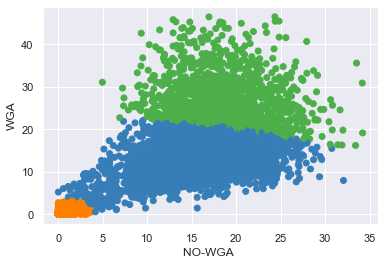

Number of clusters  4
Converged:  True
BIC:  77204.64507058037


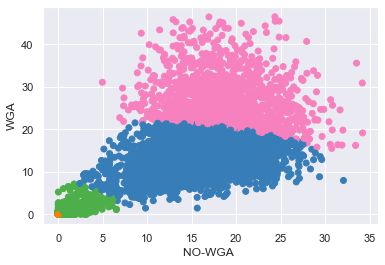

Number of clusters  5
Converged:  True
BIC:  75545.80016346334


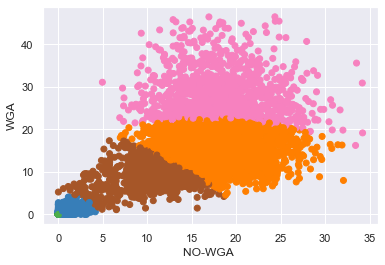

In [45]:
gmm_clustering(clusters=N_CLUSTERS, data=data, tol=1.0e-5, cov_type='spherical',
               max_itrs=300, n_init=1,
               no_wga_mu=no_wga_mu, wga_mu=wga_mu)